## **Capstone Project Modul 3**

![Bank Wallpaper.png](<attachment:Bank Wallpaper.png>)
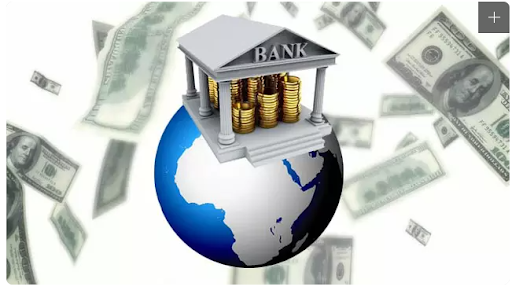

In [1]:
# import library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Ensemble Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # Begging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score

# import library untuk oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# import library untuk undersampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss



## **1. Problem Statement**

Setiap Perusahaan prosedur serta langkah tersendiri yang bertujuan untuk mencapai goals pada Perusahaan tersebut, terutama Perusahaan dalam bidang Perbankan. Perusahaan Perbankan membutuhkan banyak Nasabah dalam meningkatkan profit serta pemasukan bagi Perusahaan. Perusahaan Perbankan dalam usaha meningkatkan profit melalui Nasabah menyediakan layanan yang disediakan terhadap calon Nasabah, salah satu layanan tersebut adalah deposit. Deposit menurut Kasmir, Sukamto, dan Ali (2003) merupakan penempatan dana yang dilakukan oleh nasabah kepada bank untuk ditarik kembali atau dipinjamkan oleh bank kepada nasabah dalam bentuk simpanan berjangka atau simpanan on call.

Dalam menjalankan kegiatan layanan deposit Perbankan, tentunya memiliki beberapa permasalahan yang terjadi dan tentunya permasalahan tersebut dapat mengakibatkan pengeluaran / cost bagi Perusahaan. Perusahaan tentunya akan mencari solusi terbaik untuk melakukan manajemen terhadap keuangan Perusahaan jika terjadi pengeluaran akibat dari permasalahan pada layanan deposit tersebut. Perusahaan dalam mencapai profit tentunya akan berusaha untuk meminimalisir pengeluaran serta memaksimalkan pemasukan. Selain itu Perusahaan akan berusaha untuk bisa melakukan prediksi apakah calon Nasabah akan melakukan deposit atau tidak karena hal tersebut dapat menjadi masukan bagi Perusahaan untuk menciptakan strategi dalam hal menarik calon Nasabah untuk melakukan deposit pada Perusahaan tersebut.

Oleh karena itu dalam markdown ini saya akan memberikan rekomendasi terhadap Perusahaan Perbankan yang bergerak dalam layanan deposit mengenai bagaimana meminimalisir serta melakukan manajemen terhadap pengeluaran yang dilakukan oleh Perusahaan.

## **2. Rumusan Masalah**

Permasalahan dalam dataset ini dapat diuraikan sebagai berikut:
- **Bagaimana Upaya yang Dapat dilakukan oleh Perusahaan untuk Melakukan Manajemen terhadap Pengeluaran / Cost Perusahaan**
    - Seperti yang telah dijelaskan pada bagian latar belakang sebelumnya bahwa setiap Perbankan dalam bidang deposit akan memiliki sejumlah permasalahan yang berpengaruh terhadap pengeluaran dari Perusahaan. Permasalahan yang akan saya ambil dalam Perusahaan Perbankan deposit ini adalah manajemen pengeluaran Perusahaan terhadap keputusan melakukan deposit atau tidak dari setiap calon Nasabah. Permasalahan ini dapat saya uraikan dalam bentuk Confusion Matrix. Confusion Matrix merupakan matrix yang terdiri atas kondisi seperti True Negative (TN), True Positive (TP), False Negative (FN), dan False Positive (FP) yang dapat diuraikan sebagai berikut.
        - **True Negative**: Ketika seorang nasabah diprediksi tidak akan melakukan deposit kemudian memang kenyataannya nasabah tersebut tidak melakukan deposit
        - **True Positive**: Ketika seorang nasabah diprediksi akan melakukan deposit kemudian kenyataannya nasabah tersebut melakukan deposit
        - **False Negative**: Ketika seorang nasabah diprediksi tidak melakukan deposit namun kenyataannya nasabah tersebut melakukan deposit
        - **False Positive**: Ketika seorang nasabah diprediksi akan melakukan deposit namun kenyataannya nasabah tersebut tidak melakukan deposit
    - Perusahaan mengasumsikan biaya sebagai berikut
        - Biaya yang dikeluarkan oleh Perusahaan untuk marketing kepada calon Nasabah (Kondisi False Negative): $20 / orang
        - Biaya yang dikeluarkan Perusahaan untuk memberikan layanan terhadap calon Nasabah yang diperkirakan akan melakukan deposit: $50 / orang
    - Kemudian kita ingin mengetahui biaya mana yang lebih tinggi yang akan dikeluarkan oleh Perusahaan Perbankan pada saat kondisi False Negative dan False Positive. Menurut saya perusahaan akan mengeluarkan biaya lebih tinggi pada saat kondisi False Positive (Seorang nasabah diprediksi akan melakukan deposit namun kenyataannya tidak melakukan deposit). Hal tersebut saya pilih karena ketika seorang nasabah diprediksi akan melakukan deposit maka Perusahaan akan mengeluarkan banyak biaya untuk melakukan pemasaran terhadap calon nasabah agar nasabah tersebut diharapkan akan melakukan deposit. Perusahaan telah mengeluarkan biaya untuk memberikan layanan terhadap calon Nasabah yang diperkirakan akan melakukan deposit namun kenyataannya calon Nasabah tersebut memutuskan untuk tidak melakukan deposito sehingga Perusahaan sepenuhnya akan melakukan pengeluaran tanpa ada satupun pemasukan dari calon Nasabah tersebut.
    - Sedangkan jika saya memilih melakukan manajemen pengeluaran pada saat kondisi False Negative, maka biaya yang sebelumnya dikeluarkan oleh Perusahaan untuk meningkatkan marketing agar dapat menarik calon nasabah untuk melakukan deposit kemudian ketika calon Nasabah tersebut memutuskan untuk melakukan deposit maka Perusahaan akan menerima pendapatan dari calon Nasabah yang melakukan deposito tersebut.
    - Oleh karena biaya yang dikeluarkan akan lebih tinggi ketika pada saat kondisi False Positive maka Perusahaan akan berusaha untuk menurunkan biaya yang telah dikeluarkan oleh Perusahaan tersebut. Kemudianaka metrik yang dapat kita gunakan untuk melakukan pemilihan terhadap model Machine Learning yaitu Precision.

- **Model Machine Learning (ML) apakah yang bisa diaplikasikan oleh perusahaan untuk melakukan prediksi deposit atau Tidak dari Setiap calon Nasabah**
    - Prediksi dilakukan untuk mengetahui apakah setiap calon Nasabah akan melakukan deposit atau tidak sehingga hasil prediksi tersebut diharapkan akan menjadi bahan pertimbangan bagi Perusahaan untuk melakukan manajemen pengeluaran Perusahaan. Dengan adanya prediksi tersebut Perusahaan memiliki referensi apakah keuangan yang dimiliki akan dikeluarkan untuk melakukan marketing, meningkatkan layanan deposit, atau tidak melakukan pengeluaran sama sekali.
    - Untuk dapat melakukan prediksi tersebut maka saya akan membuat sebuah model Machine Learning (ML)

## **3. Sistematika Penelitian**

Penyelesaian permasalahan ini dapat dibagi menjadi beberapa bagian sebagai berikut:
- **Data Understanding**
    - Merupakan bagian untuk mengetahui isi dari dataset yang diberikan dengan tujuan untuk mengetahui informasi dari data 
- **Data Cleaning**
    - Tahap untuk membersihkan dataset dengan tujuan agar proses analisis dan modeling tidak terganggu oleh Noise yang disebabkan akibat data tidak dilakukan cleaning. Adapun proses dari Data Cleaning dapat diuraikan sebagai berikut.
        - Handling Missing Value
        - Handling Duplicate Data
        - Outliers Checking
        - Handling Ireelevant feature or value
        - Feature Selection
- **Exploratory Data Analysis (EDA)**
    - EDA merupakan tahapan untuk menampilkan insight yang dapat diambil dari data dan dapat dilakukan dengan bantuan dari visualisasi
- **Define Variable**
    - Mendefinisikan variabel X (Feature) dan Y (Target) sebagai prasyarat untuk membuat sebuah model Machine Learning (ML)
- **Data Splitting**
    - Mendefinisikan data training dan testing agar model Machine Learning (ML) dapat mempelajari terlebih dahulu dari data yang ada untuk kemudian model tersebut akan diujikan terhadap data Testing untuk mengetahui seberapa besar akurasi dari model yang dipilih
- **Data Preprocessing**
    - Mempersiapkan data agar data tersebut mampu disediakan untuk melakukan pembuatan model Machine Learning (ML). Adapun bagian dari Data Preprocessing terdiri sebagai berikut
        - Encoding
        - Scaling
        - Binning
        - Handling Missing Value (Optional)
- **Cross Validation**
    - Merupakan tahapan untuk memilih model / algoritma Machine Learning (ML) terbaik berdasarkan metrik / scoring yang digunakan
- **Hyperparameter Tuning**
    - Menentukkan parameter terbaik dari model yang terpilih dari proses Cross Validation sebelumnya
- **Menentukan Threshold terbaik**
    - Threshold merupakan ambang batas yang menentukkan apakah setiap baris data dikategorikan sebagai kelas negatif (0) atau positif (1) pada variabel target. Pada tahapan ini akan menentukkan berapa nilai ambang batas terbaik sehingga nilai Threshold tersebut diharapkan akan meningkatkan akurasi dari model yang dipilih
- **Menampilkan Confusion Matrix**
    - Menampilkan Confusion Matrix bertujuan untuk mengetahui nilai / value dari setiap kondisi yang ada
- **Membandingkan model pada saat sebelum dan sesudah Tuning**
    - Bertujuan untuk mengetahui model mana yang terbaik jika dibandingkan pada saat sebelum dan sesudah dilakukan Tuning. Perbandingan tersebut dapat dilihat dari nilai akurasi dari model pada setiap kondisi. 
- **Feature Importance**
    - Feature Importance merupakan tahapan untuk mengetahui fitur manakah yang berpengaruh signifikan terhadap variabel target

## **4. Data Understanding**

Berikut merupakan penjelasan dari setiap kolom dalam dataset
- **Age**: Merupakan kolom yang menyimpan informasi tentang usia nasabah.
- **Job**: Mengandung informasi tentang pekerjaan atau profesi dari nasabah.
- **Balance**: Menunjukkan saldo rekening nasabah.
- **Housing**: Berisi informasi apakah nasabah memiliki pinjaman perumahan atau tidak. Nilai "yes" menunjukkan bahwa nasabah memiliki pinjaman perumahan, sedangkan "no" menunjukkan sebaliknya.
- **Loan**: Menyimpan informasi apakah nasabah memiliki pinjaman pribadi atau tidak. "Yes" berarti nasabah memiliki pinjaman pribadi, dan "no" berarti tidak.
- **Contact**: Kolom ini mencatat jenis kontak yang digunakan untuk berkomunikasi dengan nasabah, misalnya, "cellular" (ponsel) atau "telephone" (telepon rumah).
- **Month**: Menyimpan informasi bulan ketika kontak terakhir dilakukan.
- **Campaign**: Merupakan jumlah kontak yang dilakukan selama kampanye pemasaran ini terhadap nasabah.
- **Pdays**: Menyimpan jumlah hari sejak kontak terakhir dilakukan. Jika nasabah belum pernah dihubungi sebelumnya, nilai bisa menjadi -1 atau nilai yang menunjukkan tidak berlakunya.
- **poutcome**: Menyimpan hasil dari kampanye pemasaran sebelumnya terhadap nasabah.
- **deposit**: Merupakan target atau variabel yang ingin diprediksi, apakah nasabah akan melakukan deposit atau tidak. Nilai "yes" menunjukkan bahwa nasabah melakukan deposit, sedangkan "no" menunjukkan sebaliknya._

## **Import Library**

In [2]:
# import library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Ensemble Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # Begging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score

# import library untuk oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# import library untuk undersampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt



## **5. Load Dataset**

In [3]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [4]:
# deposit = yes adalah kelas 1
# deposit = no adalah kelas 0

df['deposit'] = np.where(df['deposit'] == "yes", 1, 0)
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


In [5]:
# Check Unique Values exist in dataset
# To show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


In [6]:
# Displaying the count of values in the 'deposit' column
deposit_count = df['deposit'].value_counts().reset_index()
deposit_count.columns = ['Deposit', 'Count']

# Displaying the percentage of each value in the 'deposit' column
deposit_percentage = (df['deposit'].value_counts() / len(df['deposit']) * 100).reset_index()
deposit_percentage.columns = ['Deposit', 'Percentage']

# Combine both count and percentage into a single DataFrame
deposit_data = pd.merge(deposit_count, deposit_percentage, on='Deposit')
deposit_data


,Deposit,Count,Percentage
0,0,4081,52.233457
1,1,3732,47.766543


## **6. Data Cleaning**

**Value Selection**

In [7]:
df.dropna().describe(include=['O'])

,job,housing,loan,contact,month,poutcome
count,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4
top,management,no,no,cellular,may,unknown
freq,1792,4140,6789,5628,1976,5819


In [8]:
# Mengetahui value dari kolom balance
df.sorted = df.sort_values(by ='balance', ascending=True)
df.head(30)

C:\Users\milha\AppData\Local\Temp\ipykernel_8336\1930374773.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.sorted = df.sort_values(by ='balance', ascending=True)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,0
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1
8,35,management,805,no,no,cellular,sep,1,-1,unknown,0
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,0


In [9]:
df['job'] = df['job'].astype(str)

In [10]:
df_sorted = df.sort_values(by='job')
filtered_data = df_sorted[df_sorted['job'] == 'management']
filtered_data.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
5167,27,management,843,no,no,cellular,jan,1,-1,unknown,1
4760,42,management,525,no,no,cellular,aug,2,-1,unknown,0
7540,35,management,431,no,no,cellular,aug,2,397,failure,1
7542,31,management,1224,yes,yes,cellular,nov,2,119,success,0
1023,36,management,254,no,no,cellular,feb,2,-1,unknown,1


In [11]:
# Memfilter data pada kolom balance yang kurang dari 1000 karena nilai tersebut merupakan nilai yang tidak make sense 
df = df[(df['balance'] >= 1000)]
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
10,23,student,1234,no,no,cellular,feb,1,91,success,1
11,33,housemaid,1107,yes,no,cellular,mar,1,-1,unknown,1


In [12]:
# Meremove data yang memiliki string 'unknown' pada kolom kategorik
df = df[df['poutcome'] != 'unknown']

In [13]:
df = df[df['contact'] != 'unknown']

In [14]:
df = df[df['job'] != 'unknown']

**Handling Missing Value**

In [15]:
# Cek missing value
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

**Cek Duplikat**

In [16]:
# Cek duplikat
df.duplicated().sum()

0

**Data Formatting**

In [17]:
# Mengetahui format dari setiap kolom dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 2 to 7809
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       829 non-null    int64 
 1   job       829 non-null    object
 2   balance   829 non-null    int64 
 3   housing   829 non-null    object
 4   loan      829 non-null    object
 5   contact   829 non-null    object
 6   month     829 non-null    object
 7   campaign  829 non-null    int64 
 8   pdays     829 non-null    int64 
 9   poutcome  829 non-null    object
 10  deposit   829 non-null    int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 74.5+ KB


**Outliers Checking**

<Axes: xlabel='age'>

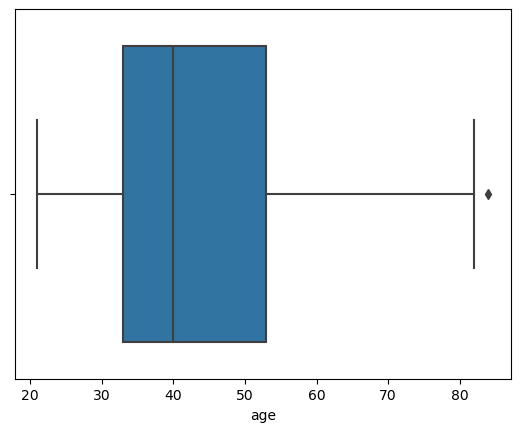

In [18]:
# Boxplot age
sns.boxplot(data=df, x='age')

<Axes: xlabel='balance'>

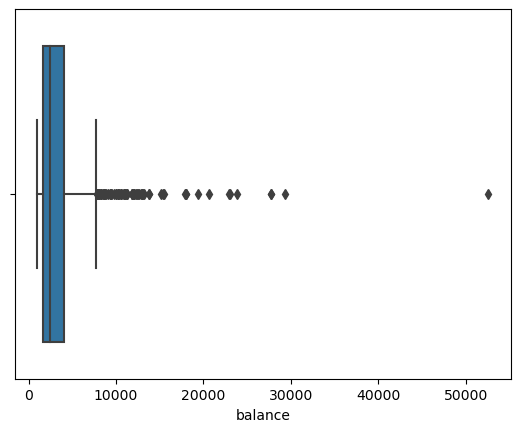

In [19]:
# Boxplot balance
sns.boxplot(data=df, x='balance')

In [20]:
# Hapus outlier diatas 30000 pada kolom balance
df = df[~(df['balance'] > 35000)]
df.shape

(828, 11)

<Axes: xlabel='campaign'>

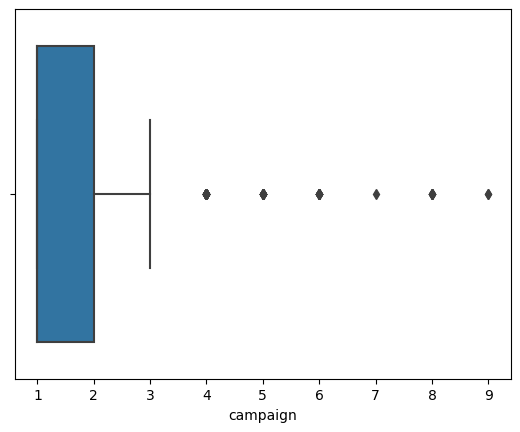

In [21]:
# Boxplot campaign
sns.boxplot(data=df, x='campaign')

In [22]:
# Hapus outlier diatas 35 pada kolom campaign
df = df[~(df['campaign'] > 35)]
df.shape

(828, 11)

<Axes: xlabel='pdays'>

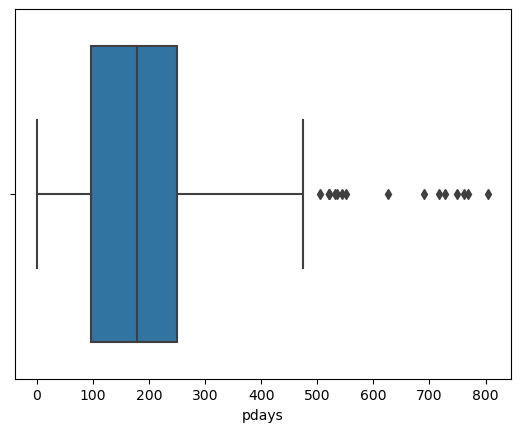

In [23]:
# Boxplot pdays
sns.boxplot(data=df, x='pdays')

In [24]:
# Hapus outlier diatas 600 pada kolom pdays
df = df[~(df['pdays'] > 600)]
df.shape

(820, 11)

## **7. Exploratory Data Analysis (EDA)**

In [25]:
# Menampilkan summary statistics
df.describe()

,age,balance,campaign,pdays,deposit
count,820.000000,820.000000,820.000000,820.000000,820.000000
mean,43.529268,3587.751220,1.853659,186.818293,0.741463
std,13.503506,3478.053308,1.263964,105.065535,0.438098
min,21.000000,1000.000000,1.000000,1.000000,0.000000
25%,33.000000,1595.000000,1.000000,96.750000,0.000000
50%,40.000000,2421.500000,1.000000,178.000000,1.000000
75%,53.000000,4060.750000,2.000000,242.000000,1.000000
max,84.000000,29340.000000,9.000000,551.000000,1.000000


In [26]:
# Mengetahui nilai korelasi dari setiap kolom numerik
df.corr(numeric_only=True)

,age,balance,campaign,pdays,deposit
age,1.000000,0.014638,0.020067,-0.077960,0.110257
balance,0.014638,1.000000,-0.006757,-0.037920,0.040512
campaign,0.020067,-0.006757,1.000000,0.026941,-0.050769
pdays,-0.077960,-0.037920,0.026941,1.000000,-0.086306
deposit,0.110257,0.040512,-0.050769,-0.086306,1.000000


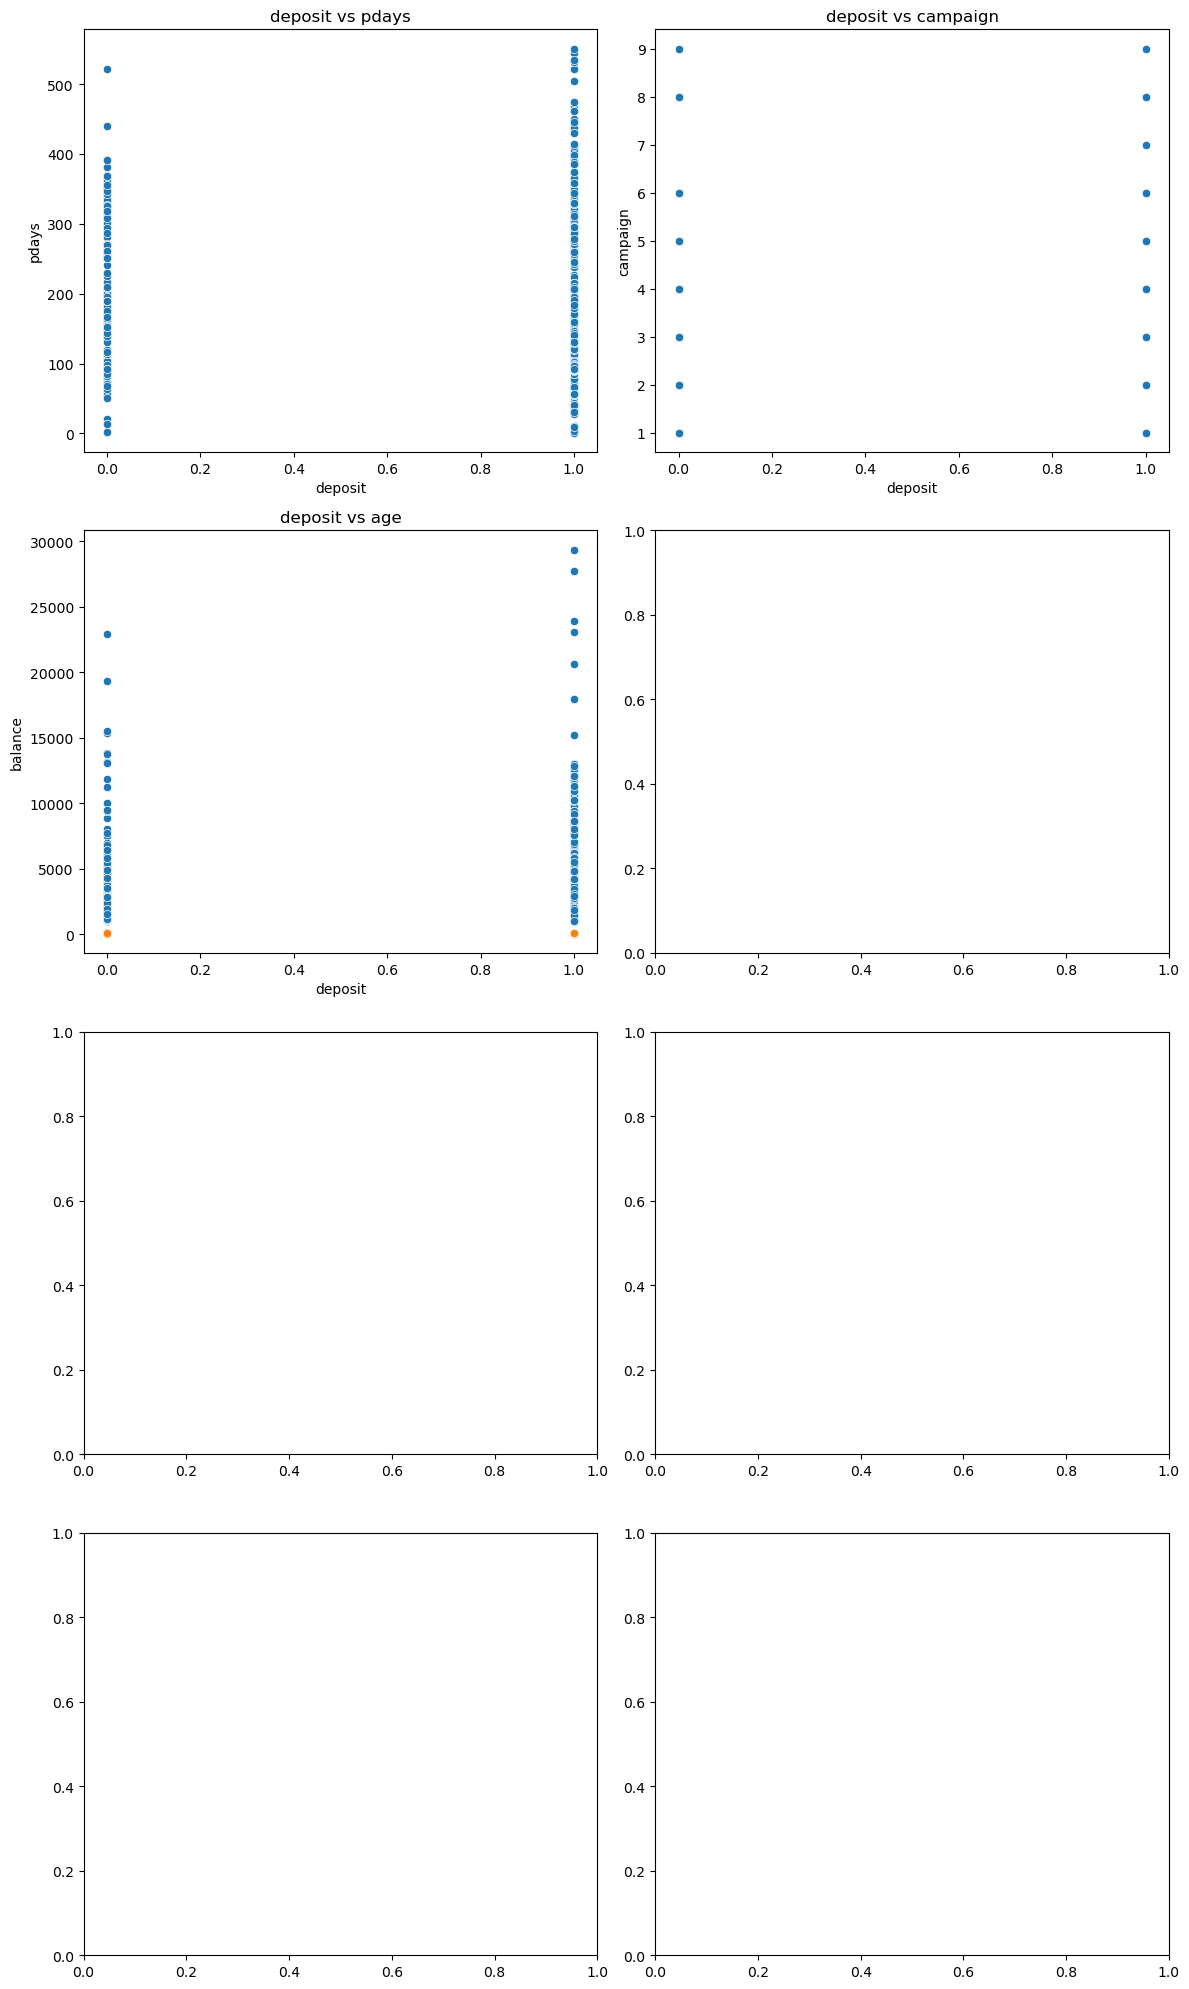

In [27]:
# Menampilkan visualisasi scatterplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))

sns.scatterplot(data=df, x='deposit', y='pdays', ax=axes[0, 0]).set_title('deposit vs pdays')
sns.scatterplot(data=df, x='deposit', y='campaign', ax=axes[0, 1]).set_title('deposit vs campaign')
sns.scatterplot(data=df, x='deposit', y='balance', ax=axes[1, 0]).set_title('deposit vs balance')
sns.scatterplot(data=df, x='deposit', y='age', ax=axes[1, 0]).set_title('deposit vs age')

plt.tight_layout()
plt.show()

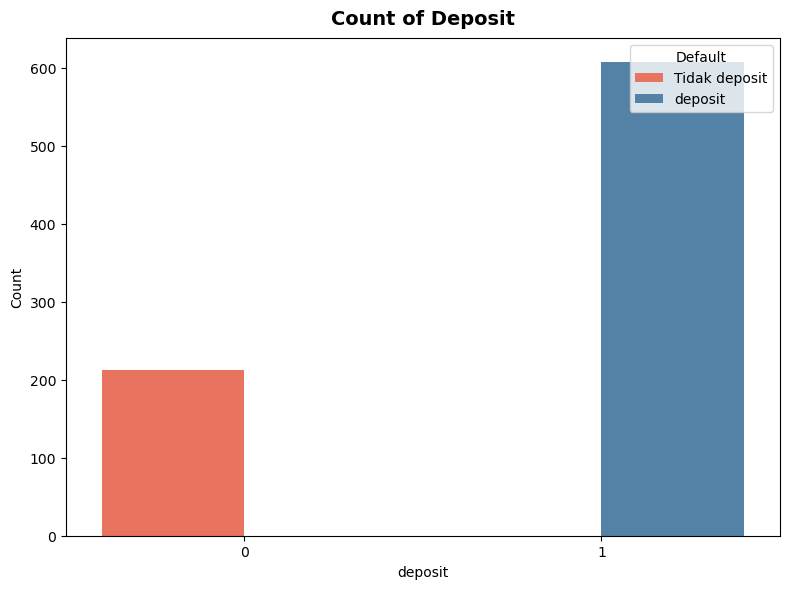

In [28]:
# Set custom color palette for Malignant (M) and Benign (B)
custom_palette = {0: "#FF6347", 1: "#4682B4"}

# Plot countplot with improved aesthetics
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='deposit', hue='deposit', palette=custom_palette)

# Set labels and title
plt.xlabel('deposit')
plt.ylabel('Count')
plt.title('Count of Deposit', pad=10, fontsize=14,fontweight='bold')

# Set legend labels for Malignant and Benign
plt.legend(labels=['Tidak deposit', 'deposit'], title='Default', loc='upper right')

plt.tight_layout()
plt.show()

## **8. Define X and y**

In [29]:
# Define X y
X = df.drop(columns='deposit')
y = df['deposit']

## **9. Data Splitting**


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.2,
                 random_state=0,
                 stratify=y)

## **10. Data Preprocessing**

- **Encoding**
    - Binary Encoding: job dan month
    - One Hot Encoding: housing, loan, contact, dan poutcome
- **Scaling**
    - Robust Scaling: age, balance, campaign, dan pdays
    

In [31]:
df.describe(include='object')

,job,housing,loan,contact,month,poutcome
count,820,820,820,820,820,820
unique,11,2,2,2,12,3
top,management,no,no,cellular,may,success
freq,227,499,768,748,140,340


In [32]:
transformer = ColumnTransformer([
    ('onehot_encoder', OneHotEncoder(), ['housing', 'loan', 'contact','poutcome']),
    ('binary_encoder', BinaryEncoder(), ['job','month']),
    ('fobust_scaling', RobustScaler(), ['age','balance','campaign','pdays'])
], remainder='passthrough')

In [33]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.sample()

,onehot_encoder__housing_no,onehot_encoder__housing_yes,onehot_encoder__loan_no,onehot_encoder__loan_yes,onehot_encoder__contact_cellular,onehot_encoder__contact_telephone,onehot_encoder__poutcome_failure,onehot_encoder__poutcome_other,onehot_encoder__poutcome_success,binary_encoder__job_0,binary_encoder__job_1,binary_encoder__job_2,binary_encoder__job_3,binary_encoder__month_0,binary_encoder__month_1,binary_encoder__month_2,binary_encoder__month_3,fobust_scaling__age,fobust_scaling__balance,fobust_scaling__campaign,fobust_scaling__pdays
170,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.3,0.01457,0.0,-0.557798


## **11. Cross Validation**

In [34]:
# Bagging
bagging = BaggingClassifier(random_state=0, estimator = KNeighborsClassifier())

# Random Forest
rf = RandomForestClassifier(random_state=0)

# Ada Boosting
adaboost = AdaBoostClassifier(random_state=0)

# Gradient Boosting
gboost = GradientBoostingClassifier(random_state=0)

# define algo
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)

In [35]:
# Voting Classifer
voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
])

# Stacking Classifier
stacking = StackingClassifier(estimators= [
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)],
    final_estimator= logreg)

In [36]:
# Cross Validation
models = [logreg, knn, tree, voting, stacking, bagging, rf, adaboost, gboost]
list_all_precision = []
list_mean_precision = []
list_std_precision = []


for i in models:
# pipe_model 
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', i)
    ])
    cv_score = cross_val_score(
        estimator=pipe_model,
        X = X_train,
        y = y_train,
        cv = 5,
        scoring ='precision'
    )
    list_all_precision.append(cv_score.round(2))
    list_mean_precision.append(cv_score.mean())
    list_std_precision.append(cv_score.std())

In [37]:
df_cv = pd.DataFrame()
df_cv['algo'] = models
df_cv['all_f1']= list_all_precision
df_cv['mean_f1'] = list_mean_precision
df_cv['std_f1'] = list_std_precision

df_cv.sort_values(by='mean_f1',ascending=False)

,algo,all_f1,mean_f1,std_f1
1,KNeighborsClassifier(),"[0.82, 0.81, 0.83, 0.83, 0.84]",0.824001,0.011257
5,"BaggingClassifier(estimator=KNeighborsClassifier(), random_state=0)","[0.82, 0.81, 0.83, 0.81, 0.83]",0.819210,0.010461
3,"VotingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3', DecisionTreeClassifier(random_state=0))])","[0.81, 0.8, 0.82, 0.79, 0.82]",0.807458,0.011357
8,GradientBoostingClassifier(random_state=0),"[0.83, 0.82, 0.8, 0.75, 0.81]",0.800806,0.028865
6,RandomForestClassifier(random_state=0),"[0.8, 0.81, 0.79, 0.77, 0.81]",0.796218,0.015107
7,AdaBoostClassifier(random_state=0),"[0.81, 0.84, 0.76, 0.77, 0.79]",0.794668,0.028579
0,LogisticRegression(random_state=0),"[0.79, 0.81, 0.8, 0.76, 0.79]",0.791206,0.016528
2,DecisionTreeClassifier(random_state=0),"[0.77, 0.76, 0.8, 0.79, 0.81]",0.786716,0.019441
4,"StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(random_state=0))],\n final_estimator=LogisticRegression(random_state=0))","[0.79, 0.78, 0.79, 0.79, 0.78]",0.786262,0.006036


## **12. Hyperparameter Tuning**

In [38]:
smote = SMOTE(random_state=0, sampling_strategy='minority')
nearmiss = NearMiss(sampling_strategy='majority')
randomover = RandomOverSampler(random_state=0)
randomunder = RandomUnderSampler(random_state=0)

In [39]:
KNeighborsClassifier()

KNeighborsClassifier()

In [40]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV

# hyperparam
hyperparam = {
    'modeling__n_neighbors': range(1, 100),
    'modeling__weights': ['uniform', 'distance'],
}

# pipeline prep dan modeling
pipe_model = Pipeline([
    ('prep', transformer),
    ('resampling', NearMiss(sampling_strategy='majority')),
    ('modeling', knn)
])

# Tuning
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    n_iter=100,
    error_score='raise'
)



In [41]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot_encoder',
                                                                               OneHotEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month']),
                                                                              ('fobust_scaling',
                                                                               RobustScaler(),
                                                                               ['age',
                                                                                'balance',
                                                                                'campaign',
                                                                                'pdays'])])),
                                             ('resampling',
                                              NearMiss(sampling_strategy='majority')),
                                             ('modeling',
                                              KNeighborsClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'modeling__n_neighbors': range(1, 100),
                                        'modeling__weights': ['uniform',
                                                              'distance']},
                   scoring='precision')

In [42]:
random_search.best_params_

{'modeling__weights': 'uniform', 'modeling__n_neighbors': 12}

In [43]:
random_search.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_encoder',
                                                  OneHotEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('fobust_scaling',
                                                  RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('resampling', NearMiss(sampling_strategy='majority')),
                ('modeling', KNeighborsClassifier(n_neighbors=12))])

In [44]:
# Assuming randomsearch is your fitted RandomizedSearchCV object
results_df = pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score').head(3)

# Display the top 3 results
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__weights,param_modeling__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.114133,0.011538,0.081026,0.003981,uniform,12,"{'modeling__weights': 'uniform', 'modeling__n_neighbors': 12}",0.833333,0.844156,0.855263,0.818182,0.934426,0.857072,0.040570,1
15,0.130593,0.017420,0.104536,0.023581,distance,6,"{'modeling__weights': 'distance', 'modeling__n_neighbors': 6}",0.859155,0.842105,0.844156,0.830986,0.882353,0.851751,0.017738,2
87,0.134836,0.049672,0.073727,0.015364,uniform,5,"{'modeling__weights': 'uniform', 'modeling__n_neighbors': 5}",0.845070,0.844156,0.842105,0.835616,0.887324,0.850854,0.018532,3


## **13. Membandingkan Model Sebelum dan Sesudah dilakukan Tuning**

In [45]:
from sklearn.metrics import f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay,classification_report

Nilai akurasi pada model sebelum dilakukan Hyperparameter Tuning lebih besar dari nilai akurasi model setelah dilakukan Hyperparameter Tuning. Maka kita akan menggunakan model tanpa dilakukan Hyperparameter Tuning untuk melakukan proses selanjutnya

In [46]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model', knn)
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_encoder',
                                                  OneHotEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('fobust_scaling',
                                                  RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('model', KNeighborsClassifier())])

In [47]:
# Model sebelum Tuning
model = Pipeline([
    ("preprocessing", transformer),
    ("model", knn)
])

model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)

# Calculate F2 score
y_pred_before = model.predict(X_test)
precision_score(y_test, y_pred_before)

0.8085106382978723

In [48]:
# define model
best_model = random_search.best_estimator_

# fitting -> Train only
best_model.fit(X_train, y_train)

# predict -> X_test
y_pred_after = best_model.predict(X_test)

# metrics accuracy
precision_score(y_test, y_pred_after)

0.9021739130434783

In [49]:
print("Nilai akurasi model sebelum dilakukan Tuning :", precision_score(y_test, y_pred_before))
print("Nilai akurasi model setelah dilakukan Tuning :", precision_score(y_test, y_pred_after))

Nilai akurasi model sebelum dilakukan Tuning : 0.8085106382978723
Nilai akurasi model setelah dilakukan Tuning : 0.9021739130434783


## **14. Mengetahui Threshold Terbaik**

In [50]:
# Assuming xgb_random_ros is your fitted RandomizedSearchCV object
best_model =  random_search.best_estimator_

# Use the best model to make predictions on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Set your desired threshold
threshold = 0.5

# Apply the threshold to get binary predictions
y_pred = (y_pred_proba > threshold).astype(int)

In [51]:
# Assuming xgb_random_ros is your fitted RandomizedSearchCV object
results_df = pd.DataFrame(random_search.cv_results_)

# Sort the DataFrame by the 'rank_test_score' column in ascending order
sorted_results_df = results_df.sort_values(by='rank_test_score')

# Display the sorted DataFrame
sorted_results_df[['params', 'mean_test_score', 'rank_test_score']].head()

,params,mean_test_score,rank_test_score
11,"{'modeling__weights': 'uniform', 'modeling__n_neighbors': 12}",0.857072,1
15,"{'modeling__weights': 'distance', 'modeling__n_neighbors': 6}",0.851751,2
87,"{'modeling__weights': 'uniform', 'modeling__n_neighbors': 5}",0.850854,3
68,"{'modeling__weights': 'uniform', 'modeling__n_neighbors': 16}",0.850819,4
62,"{'modeling__weights': 'distance', 'modeling__n_neighbors': 7}",0.850680,5


In [52]:
best_model = random_search.best_estimator_


In [53]:

# Use the best model to make predictions on the test set
y_pred = best_model.predict(X_test)

# Create a DataFrame with different threshold values and their corresponding precision scores
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    results.append({'Threshold': threshold, 'Precision': precision})

precision_df = pd.DataFrame(results)

# Sort the DataFrame by precision in descending order
sorted_precision_df = precision_df.sort_values(by='Precision', ascending=False)

# Display the sorted DataFrame
sorted_precision_df


,Threshold,Precision
7,0.8,0.970588
8,0.9,0.916667
6,0.7,0.915254
5,0.6,0.909091
4,0.5,0.902174
3,0.4,0.839286
2,0.3,0.800000
1,0.2,0.777778
0,0.1,0.751634


In [54]:
# Get the best threshold and its corresponding precision score
best_threshold_row = sorted_precision_df.iloc[0]
best_threshold = best_threshold_row['Threshold']
best_precision = best_threshold_row['Precision']

# Print or use the best threshold and precision score
print("Best Threshold:", best_threshold)
print("Corresponding Precision:", best_precision)


Best Threshold: 0.8
Corresponding Precision: 0.9705882352941176


## **15. Confusion Matrix**

**Confusion Matrix sebelum Tuning**

In [55]:

cf_before = confusion_matrix(y_test,y_pred_before)
cf_before

array([[ 15,  27],
       [  8, 114]], dtype=int64)

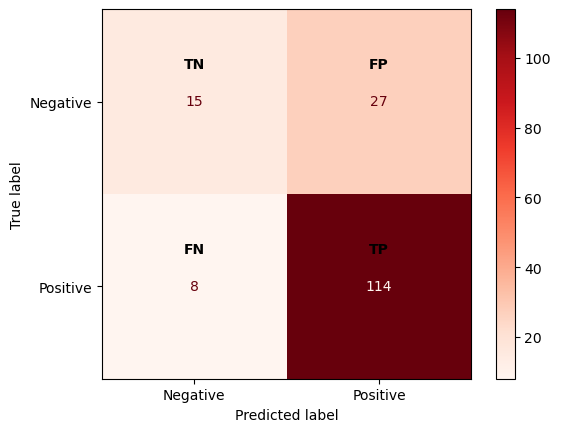

In [56]:
# Display confusion matrix without numeric values
disp = ConfusionMatrixDisplay(confusion_matrix=cf_before, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Reds', values_format='')

# Add abbreviations above the cells with higher positioning
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()

**Confusion Metrix setelah Tuning**

In [57]:
cf_after = confusion_matrix(y_test,y_pred_after)
cf_after

array([[33,  9],
       [39, 83]], dtype=int64)

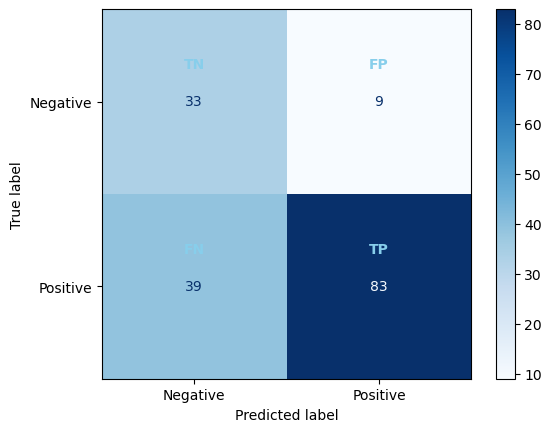

In [58]:
# Display confusion matrix without numeric values
disp = ConfusionMatrixDisplay(confusion_matrix=cf_after, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='')

# Add abbreviations above the cells with higher positioning
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='skyblue', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='skyblue', fontweight='bold')

# Show the plot
plt.show()

**Confusion setelah Tuning dengan Threshold terbaik**

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. Make Predictions
y_pred_prob = random_search.predict_proba(X_test)[:, 1]

# 2. Apply Threshold
threshold = 0.9
y_pred = (y_pred_prob >= threshold).astype(int)

# 3. Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix
cm


array([[ 41,   1],
       [111,  11]], dtype=int64)

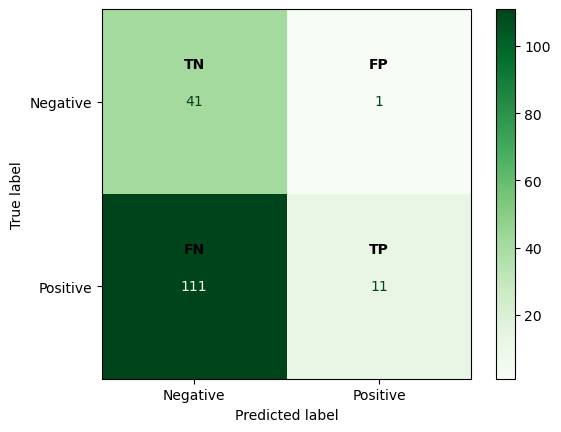

In [60]:
# Display confusion matrix without numeric values
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Greens', values_format='')

# Add abbreviations above the cells with higher positioning
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()

## **Conclusion**

- **Biaya Pengeluaran Perusahaan Sebelum Menggunakan Modeling Machine Learning (ML)**
    - Permasalahan yang ingin dipecahkan dalam hal ini merupakan bagaimana cara Perusahaan Perbankan untuk melakukan manajemen serta meminimalisir pengeluaran ketika terjadi kondisi seorang nasabah yang sebelumnya diprediksi akan melakukan deposit namun secara aktual calon Nasabah tersebut tidak melakukan deposit sehingga Perusahaan telah mengeluarkan cost untuk memberikan layanan terhadap calon Nasabah untuk meyakinkan Nasabah tersebut melakukan deposit.
    - Jika dilihat dari nilai FP (False Positive) pada Confusion Matrix sebelum menggunakan modeling maka terdapat sejumlah 27 calon Nasabah yang diprediksi akan melakukan deposit namun aktualnya tidak melakukan deposit / salah prediksi. Maka biaya yang telah dikeluarkan oleh Perusahaan pada saat sedang memprediksi calon Nasabah tersebut adalah sebesar 27 x $50 = $ 135

- **Biaya Pengeluaran Perusahaan setelah Menggunakan Modeling Machine Learning (ML)**
    - Setelah menggunakan modeling dan model terbaik dengan menggunakan K-Nearest Neighbors. Maka penggunaan model tersebut dapat menurunkan biaya pengeluaran FP pada Perusahaan tersebut
    - Jika dilihat dari nilai FP pada Confusion Matrix setelah menggunakan modeling + Threshold terbaik maka jumlah calon Nasabah yang diprediksi akan melakukan deposit namun aktualnya tidak melakukan deposit menjadi turun drastis yaitu hanya 1 calon Nasabah saja jika dibandingkan jumlah calon Nasabah sebelum dilakukan modeling yaitu sejumlah 27 calon Nasabah. Maka biaya yang dikeluarkan Perusahaan pada saat salah prediksi setelah dilakukan modeling adalah hanya sebesar 1 x $50 = $50 saja.

In [61]:
testing.columns

Index(['onehot_encoder__housing_no', 'onehot_encoder__housing_yes',
       'onehot_encoder__loan_no', 'onehot_encoder__loan_yes',
       'onehot_encoder__contact_cellular', 'onehot_encoder__contact_telephone',
       'onehot_encoder__poutcome_failure', 'onehot_encoder__poutcome_other',
       'onehot_encoder__poutcome_success', 'binary_encoder__job_0',
       'binary_encoder__job_1', 'binary_encoder__job_2',
       'binary_encoder__job_3', 'binary_encoder__month_0',
       'binary_encoder__month_1', 'binary_encoder__month_2',
       'binary_encoder__month_3', 'fobust_scaling__age',
       'fobust_scaling__balance', 'fobust_scaling__campaign',
       'fobust_scaling__pdays'],
      dtype='object')

Permutation Importance: This method measures the importance of each feature by shuffling its values and observing the effect on the model's performance. Higher performance drop indicates higher feature importance.

In [62]:
from sklearn.inspection import permutation_importance

# Assuming your KNeighborsClassifier instance is named best_model
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()
for idx in sorted_idx:
    print(f"{X_test.columns[idx]}: {result.importances_mean[idx]:.4f}")


contact: -0.0061
balance: 0.0110
month: 0.0183
age: 0.0207
pdays: 0.0213
loan: 0.0213
campaign: 0.0366
job: 0.0415
poutcome: 0.0555
housing: 0.0823


## **16. Feature Importance**

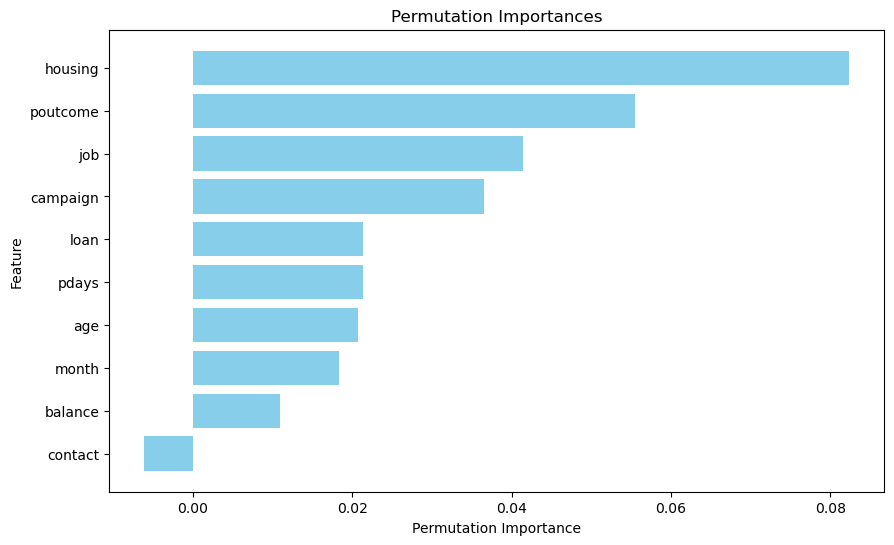

In [63]:
# Assuming your KNeighborsClassifier instance is named best_model
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

# Extract feature names and importances
feature_names = [X_test.columns[idx] for idx in sorted_idx]
importances = [result.importances_mean[idx] for idx in sorted_idx]

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importances')
plt.show()



## **Insight**
 - Feature Importances merupakan item yang bertujuan untuk mengetahui fitur-fitur yang memiliki pengaruh signifikan terhadap target. Variabel yang menjadi target dalam penelitian ini adalah 'deposit', sedangkan fitur selain 'deposit' merupakan fitur yang berkontribusi terhadap target.
 - Jika dilihat pada plot maka fitur 'housing' merupakan fitur yang paling berpengaruh terhadap target, yaitu 'deposit'. Sehingga dapat disimpulkan bahwa apakah seorang calon Nasabah memiliki pinjaman rumah atau tidak merupakan fitur yang paling berpengaruh untuk menentukkan apakah calon Nasabah tersebut melakukan deposit atau tidak
 